In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
conn = sqlite3.connect('olist.db')

In [4]:
csv_files = [
    'data/customers.csv',
    'data/orders.csv',
    'data/order_items.csv',
    'data/products.csv',
    'data/sellers.csv',
    'data/order_payments.csv',
    'data/order_reviews.csv',
    'data/geolocation.csv',
    'data/product_category_name_translation.csv'
]

for file in csv_files:
    table_name = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    df.to_sql(table_name, conn, if_exists='replace', index=False)

### "리뷰 점수가 낮은 고객들은 왜 불만이 많은가"

In [5]:
pd.read_sql("SELECT NAME FROM sqlite_master WHERE type='table';", conn)

,name
0,customers
1,orders
2,order_items
3,products
4,sellers
5,order_payments
6,order_reviews
7,geolocation
8,product_category_name_translation


In [6]:
pd.read_sql("SELECT * FROM ORDERS LIMIT 5", conn)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
pd.read_sql("SELECT * FROM CUSTOMERS LIMIT 5", conn)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
pd.read_sql("SELECT * FROM ORDER_ITEMS LIMIT 5", conn)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
pd.read_sql("SELECT * FROM PRODUCTS LIMIT 5", conn)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
pd.read_sql("SELECT * FROM ORDER_REVIEWS LIMIT 5", conn)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
review_count = pd.read_sql('SELECT REVIEW_SCORE, COUNT(*) AS review_score_count FROM ORDER_REVIEWS GROUP BY REVIEW_SCORE', conn)
review_count

,review_score,review_score_count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


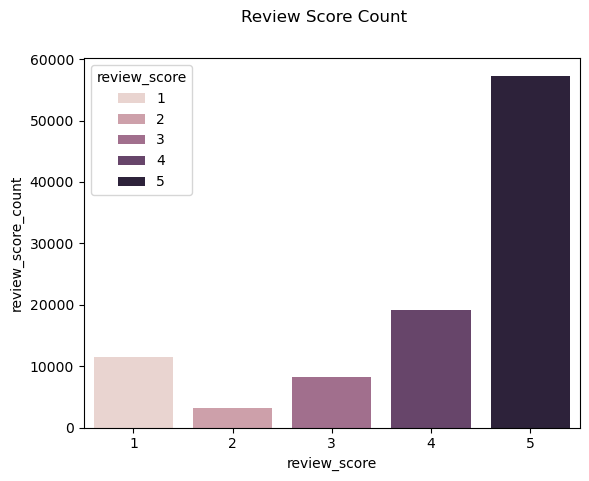

In [12]:
sns.barplot(data=review_count,x='review_score',y='review_score_count',hue='review_score')
fig = plt.gcf()
fig.suptitle('Review Score Count');

In [25]:
pd.read_sql("PRAGMA table_info(orders);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,order_id,TEXT,0,None,0
1,1,customer_id,TEXT,0,None,0
2,2,order_status,TEXT,0,None,0
3,3,order_purchase_timestamp,TEXT,0,None,0
4,4,order_approved_at,TEXT,0,None,0
5,5,order_delivered_carrier_date,TEXT,0,None,0
6,6,order_delivered_customer_date,TEXT,0,None,0
7,7,order_estimated_delivery_date,TEXT,0,None,0


In [32]:
query = '''
SELECT 
    r.review_score,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    ROUND(JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_estimated_delivery_date)) AS delay_days
FROM order_reviews AS r
JOIN orders AS o
ON r.order_id = o.order_id
WHERE o.order_delivered_customer_date IS NOT NULL
'''
df_delay = pd.read_sql(query,conn)
df_delay

,review_score,order_delivered_customer_date,order_estimated_delivery_date,delay_days
0,4,2017-10-10 21:25:13,2017-10-18 00:00:00,-7.0
1,4,2018-08-07 15:27:45,2018-08-13 00:00:00,-5.0
2,5,2018-08-17 18:06:29,2018-09-04 00:00:00,-17.0
3,5,2017-12-02 00:28:42,2017-12-15 00:00:00,-13.0
4,5,2018-02-16 18:17:02,2018-02-26 00:00:00,-9.0
...,...,...,...,...
96354,5,2017-03-17 15:08:01,2017-03-28 00:00:00,-10.0
96355,4,2018-02-28 17:37:56,2018-03-02 00:00:00,-1.0
96356,5,2017-09-21 11:24:17,2017-09-27 00:00:00,-6.0
96357,2,2018-01-25 23:32:54,2018-02-15 00:00:00,-20.0


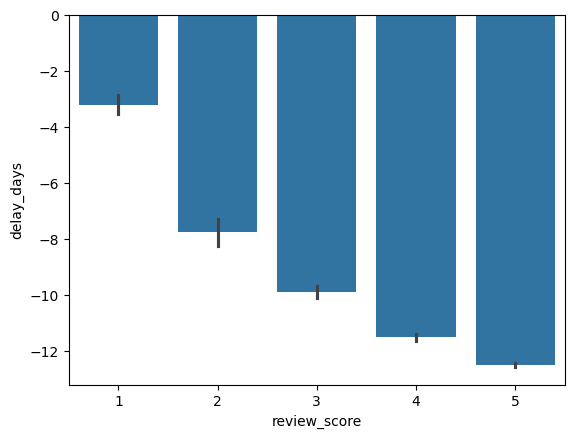

In [35]:
sns.barplot(data=df_delay, x='review_score',y='delay_days');

- 예상 배송일 보다 빨리 올 수록 리뷰 점수가 증가하긴 하지만 전반적으로 음수의 값을 가지므로 낮은 리뷰 점수가 배송 지연 때문이라고 보기 어려움